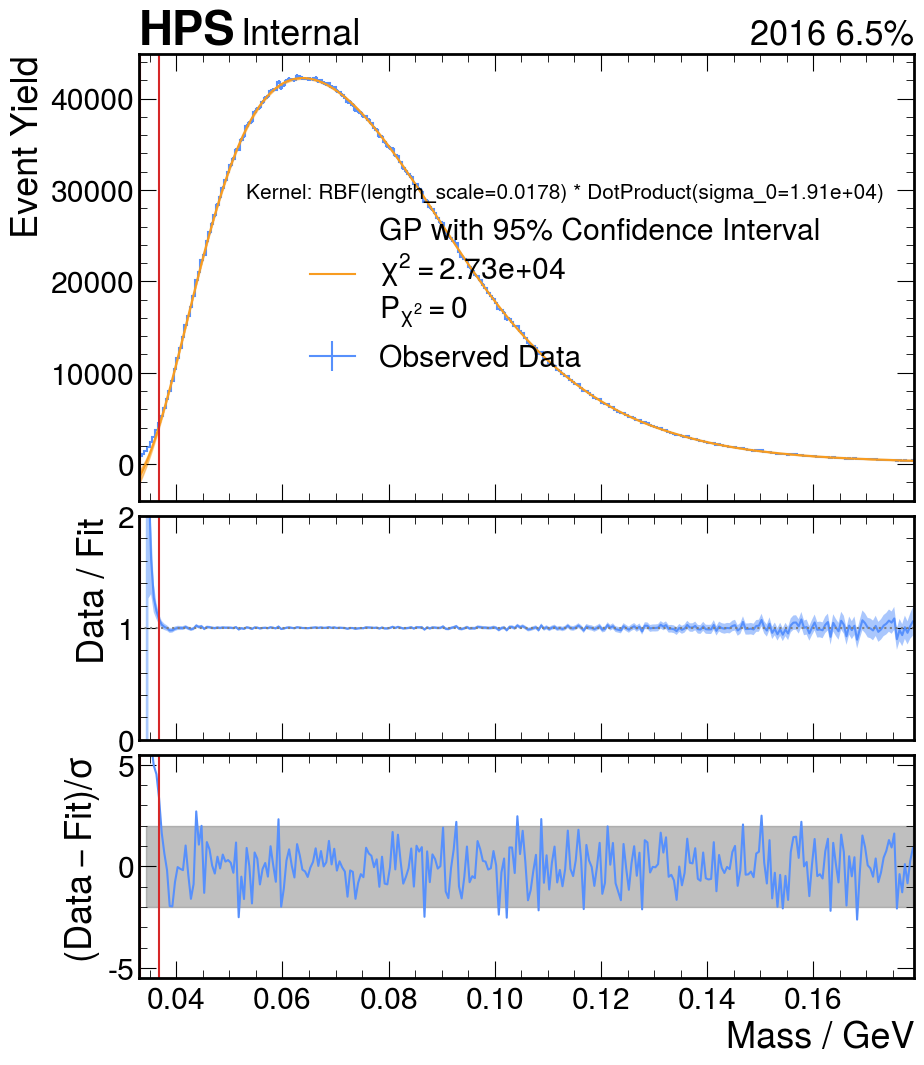

In [1]:
%load_ext autoreload
%autoreload 2
    
import gp
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import openpyxl
import math
# Making table for testing masses. Currently gives lots of inf values for unknown reason.
mass_hypothesis = .035
mass_hypotheses = np.linspace(.033,.179,73).tolist()
# Coefficients for the polynomial from the table for unsmeared (P0 to P4)
coefficients = [0.00032, 0.019, -0.11, 1.39, -4.33]

def sig_width(mass, coeffs):
    #sigma is twice the mass resolution
    return sum(c * mass**i for i, c in enumerate(coeffs))

m = gp.GaussianProcessModel(
    h = 'real', # use real IMD from ROOT file in this directory
    kernel = gp.kernels.Product(gp.kernels.RBF(), gp.kernels.DotProduct()),
    blind_range = (mass_hypothesis-2*sig_width(mass_hypothesis, coefficients), mass_hypothesis+2*sig_width(mass_hypothesis, coefficients)),
    #modify_histogram = [gp._hist.manipulation.rebin_and_limit(10, 0.033, 0.179), gp._hist.manipulation.inject_signal(100, 2*sig_width(mass_hypothesis,coefficients), mass_hypothesis)]
    modify_histogram = gp._hist.manipulation.rebin_and_limit(10,.033,.179)
)
m.model
m.model.kernel_
fig, ax = m.plot_comparison()
#pp = m.plot_pull_histogram()
#m.plot_raw()
plt.show()
with open('output.pkl','wb') as f:
    pickle.dump(m, f)

m.model

In [2]:
m.model.kernel_

RBF(length_scale=0.0178) * DotProduct(sigma_0=1.91e+04)

In [3]:
m.chi2_statistic

np.float64(27332.26500887155)